4일간의 '사재기'와 관련한 트위터 트윗 데이터를 수집하여 최근 사재기와 관련해서 가지고 있는 사람들의 생각을 확인해보고, 사재기와 관련한 내용들이 어떤식으로 분류되는지도 확인해보고자 하였습니다

## 트위터 데이터 크롤링

In [1]:
import GetOldTweets3 as got #트위터 데이터를 크롤링하기 위해 이 라이브러리를 사용하였습니다

In [2]:
from bs4 import BeautifulSoup

In [3]:
import datetime

days_range = []

start = datetime.datetime.strptime("2020-03-17", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-03-21", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))

  
 
print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

=== 설정된 트윗 수집 기간은 2020-03-17 에서 2020-03-20 까지 입니다 ===
=== 총 4일 간의 데이터 수집 ===


In [4]:
import time

# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") # setUntil이 끝을 포함하지 않으므로, day + 1

# 트윗 수집 기준 정의
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('사재기')\ #사재기라는 단어를 검색하면 나오는 트윗들을 크롤링했습니다
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)

# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))

=== Total num of tweets is 3400 ===


In [5]:
# 원하는 변수 골라서 저장하기

from random import uniform
from tqdm import tqdm_notebook

# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    
    # 메타데이터 목록 
    content = index.text #트윗에서 얻을 수 있는 아이디, 리트윗 수 등 중 텍스트 데이터만 불러왔습니다
        
    info_list = [content]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))

In [6]:
# 한번 데이터를 크롤링해올때마다 너무 오랜 시간이 걸렸기 때문에 따로 파일로 저장했습니다

import pandas as pd

twitter_df = pd.DataFrame(tweet_list, columns = ["text"])
twitter_df.head(10)

,text
0,미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음 뉴스
1,미국은 비데를 거의 사용 하지 않는 모양이네. 화장지 사재기로 하수구 막힘 경고 까...
2,에고..고생이 많으세요 ㅜㅜ 새삼 마스크 낀 사람은 아시안 타운에서 밖에 못본게 놀...
3,이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 h...
4,코로나19에 미국서 마리화나까지 사재기..판매량 급증 | 다음뉴스
5,한국연예인미스터트롯 영탁 사재기 의혹 해명
6,리) 레알임..이거... 우리나라는 다들 문프를 신뢰하기 때문에 사재기 안 하는 거...
7,ㅇㅇ 맞음...사재기는 군인독재정권 때랑 명박이 ㄹ혜때 있었지...외환위기때랑 RT참조
8,대만 화장지 등 생필품 사재기..환자 100명 넘어서 재발 | 다음 뉴스 대만이 최...
9,몇년후에 미국에선 코로나 관련 영화를 만들겠지...하지만 우리는 봤다. 휴지 사재기...


In [123]:
twitter_df.to_csv("twitter_df.csv", index = False)

# 데이터 불러오기

In [1]:
import pandas as pd
twitter_df = pd.read_csv("twitter_df.csv")

In [3]:
#twitter_df.drop(twitter_df.columns[[0,1]], axis = 1, inplace = True) 
twitter_df

,text
0,미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음 뉴스
1,미국은 비데를 거의 사용 하지 않는 모양이네. 화장지 사재기로 하수구 막힘 경고 까...
2,에고..고생이 많으세요 ㅜㅜ 새삼 마스크 낀 사람은 아시안 타운에서 밖에 못본게 놀...
3,이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 h...
4,코로나19에 미국서 마리화나까지 사재기..판매량 급증 | 다음뉴스
...,...
3395,"""보균자 중 10%만 발병하고 1%만 사망한다"" ""침착하게 하던 일을 계속하자(Ke..."
3396,대다수 미국인이 사재기한 건 상황 판단이 정확하기 때문이다. 다우존스가 2만대 붕괴...
3397,화장지가 마스크원료로 쓰인다니.... 가짜뉴스가 이렇게 무섭습니다. 마스크도 아니고...
3398,미국 사람들이 정부를 못 믿어서 사재기를 한다는데 그 사람들이 정부를 믿든 못 믿든...


In [4]:
twitter_df.text[3] #한 텍스트를 확인해보니 뒤에 쓸데없는 홈페이지 주소들이 포함되어있네요

'이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 https://news.v.daum.net/v/20200321032105769'

In [5]:
text_list = [] #데이터 전처리를 손쉽게 하기 위해 리스트로 바꾸고
for i in range(len(twitter_df)):
    text_list.append(twitter_df['text'].iloc[i])

In [6]:
text_list

['미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음 뉴스 ',
 '미국은 비데를 거의 사용 하지 않는 모양이네. 화장지 사재기로 하수구 막힘 경고 까지 나오고. 헐.',
 '에고..고생이 많으세요 ㅜㅜ 새삼 마스크 낀 사람은 아시안 타운에서 밖에 못본게 놀랍네요.. 다들 물건 사재기만 하지 마스크 낀건 본적이 없어요 ',
 '이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 https://news.v.daum.net/v/20200321032105769',
 '코로나19에 미국서 마리화나까지 사재기..판매량 급증 | 다음뉴스 ',
 '한국연예인미스터트롯 영탁 사재기 의혹 해명 ',
 '리) 레알임..이거... 우리나라는 다들 문프를 신뢰하기 때문에 사재기 안 하는 거임... 국민에게 거짓말할 분이 아니라는 걸 아는거지.... 심지어 지들 정권 잡으려고 입만 열면 문프와 정부 공격하는 기레기들과 미통닭도 속으로는 문프 신뢰함.... 그래서 그거뜰도 사재기 안 하는 거..ㅋㅋㅋㅋ',
 'ㅇㅇ 맞음...사재기는 군인독재정권 때랑 명박이 ㄹ혜때 있었지...외환위기때랑 RT참조',
 '대만 화장지 등 생필품 사재기..환자 100명 넘어서 재발 | 다음 뉴스 대만이 최고로 잘하니까 무조건 본 받으라던 안철수와 그 떨거지들은 지금 어디로 사라졌나?ㅋ,, 대만따라 화장지 사재기 하고도 남을 머저리들ㅋㅋㅋ ',
 '몇년후에 미국에선 코로나 관련 영화를 만들겠지...하지만 우리는 봤다. 휴지 사재기하는 당신들을...얼레리꼴레리',
 '여긴 사재기가 너무 심해요ㅠㅠㅠ 걱정해주시구 진짜 고마워요 연두부님 두부님도 건강조심하셔야해요!!!',
 '미국의 사재기 에 대한 글을 쓰면서 사진은 독일내 상점.. 야 연합뉴스, 매년 수백억원씩 정부 보조 받아가며 흥청망청 쓰면서 미국 특파원들은 뭐하고 있길래 독일 사진 갖다 쓰고 있냐? ',
 '미국 화장지 사재기 여파..하수처리 시스템 경고음 https://news.v.daum.net/v/20200321

 ## 데이터 전처리

In [7]:
text_list.remove(text_list[83]) #중간에 확인해보면 'nan'이라는 결측치가 있어서 제거해주었습니다

In [8]:
import re 

text_result = []

for i in text_list:
    text = re.sub('[-=+...,#/(?!:$}]@','', i)#특수문자 제거
    text = re.sub('[0-9]', '', text) #숫자 제거
    text = re.sub('[a-z]', '', text) #홈페이지 주소 속 영어 소문자는 필요없으므로, 영어 소문자도 모두 제거
    text_result.append(text)

text_result = pd.DataFrame(text_result, columns=["text"]) #전처리 끝난 데이터 데이터프레임으로 완성

In [9]:
text_result

,text
0,미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음 뉴스
1,미국은 비데를 거의 사용 하지 않는 모양이네. 화장지 사재기로 하수구 막힘 경고 까...
2,에고..고생이 많으세요 ㅜㅜ 새삼 마스크 낀 사람은 아시안 타운에서 밖에 못본게 놀...
3,이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 :...
4,코로나에 미국서 마리화나까지 사재기..판매량 급증 | 다음뉴스
...,...
3394,"""보균자 중 %만 발병하고 %만 사망한다"" ""침착하게 하던 일을 계속하자(K ..."
3395,대다수 미국인이 사재기한 건 상황 판단이 정확하기 때문이다. 다우존스가 만대 붕괴를...
3396,화장지가 마스크원료로 쓰인다니.... 가짜뉴스가 이렇게 무섭습니다. 마스크도 아니고...
3397,미국 사람들이 정부를 못 믿어서 사재기를 한다는데 그 사람들이 정부를 믿든 못 믿든...


## 토크나이징

In [10]:
from konlpy.tag import Twitter
# 토크나이징을 진행했습니다

def get_token(txt):
    twitter = Twitter()
    word = []
    
    if len(txt)>0:
        tw = twitter.pos(txt)
        for i,j in tw:
            if j == 'Noun' or j == 'Verb' or j == 'Adjective': #토큰화 시킨 것들 중에서 noun, verb, adjective 만 사용하기로 결정했습니다
                #noun, verb만 사용해서도 해보았는데 그래도 이 세가지를 사용하는게 좋다고 판단함!
                word.append(i)
    return word
 
text_result['token'] = text_result['text'].apply(lambda x: get_token (x))

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
text_result #토큰화 시킨 것까지 확인!

,text,token
0,미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음 뉴스,"[미국, 화장지, 사재기, 여파, 하수, 처리, 시스템, 고음, 다음, 뉴스]"
1,미국은 비데를 거의 사용 하지 않는 모양이네. 화장지 사재기로 하수구 막힘 경고 까...,"[미국, 비데, 거의, 사용, 하지, 않는, 모양, 화장지, 사재기, 하수, 구, ..."
2,에고..고생이 많으세요 ㅜㅜ 새삼 마스크 낀 사람은 아시안 타운에서 밖에 못본게 놀...,"[에고, 고생, 많으세요, 새삼, 마스크, 낀, 사람, 아시안, 타운, 본게, 놀랍..."
3,이해할수없다 ㅋㅋ 미국 화장지 사재기 여파..하수처리 시스템 경고음 | 다음뉴스 :...,"[이해, 할수, 없다, 미국, 화장지, 사재기, 여파, 하수, 처리, 시스템, 고음..."
4,코로나에 미국서 마리화나까지 사재기..판매량 급증 | 다음뉴스,"[코로나, 미국, 마리화나, 사재기, 판매량, 급증, 다음, 뉴스]"
...,...,...
3394,"""보균자 중 %만 발병하고 %만 사망한다"" ""침착하게 하던 일을 계속하자(K ...","[보균자, 중, 만, 발병, 만, 사망, 한다, 침착하게, 하던, 일, 계속, 하자..."
3395,대다수 미국인이 사재기한 건 상황 판단이 정확하기 때문이다. 다우존스가 만대 붕괴를...,"[대다수, 미국인, 사재기, 건, 상황, 판단, 정확하기, 때문, 다우존스, 만대,..."
3396,화장지가 마스크원료로 쓰인다니.... 가짜뉴스가 이렇게 무섭습니다. 마스크도 아니고...,"[화장지, 마스크, 원료, 쓰인다니, 가짜, 뉴스, 무섭습니다, 마스크, 아니고, ..."
3397,미국 사람들이 정부를 못 믿어서 사재기를 한다는데 그 사람들이 정부를 믿든 못 믿든...,"[미국, 사람, 정부, 못, 믿어서, 사재기, 한다는데, 그, 사람, 정부, 믿든,..."


 ### 단어 빈도수 시각화

In [ ]:
#이부분을 일부로 찾은 이유는  사재기와 관련해서 어떤 단어들에 대해서 유사도를 측정하면 좋을지 
#먼저 확인하고 그 단어들 위주로 단어간 유사도를 측정하여 인사이트를 얻고 싶어 먼저 진행하였습니다

In [12]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pylab as plt

In [13]:
word_list = []
for i in range(len(text_result)):
    for j in range(len(text_result['token'].iloc[i])):
        if len(text_result['token'].iloc[i][j]) > 1: #토큰화 시킨 단어들 중 한글자는 제외시켰습니다
            word_list.append(text_result['token'].iloc[i][j]) 

word_list

['미국',
 '화장지',
 '사재기',
 '여파',
 '하수',
 '처리',
 '시스템',
 '고음',
 '다음',
 '뉴스',
 '미국',
 '비데',
 '거의',
 '사용',
 '하지',
 '않는',
 '모양',
 '화장지',
 '사재기',
 '하수',
 '막힘',
 '경고',
 '나오고',
 '에고',
 '고생',
 '많으세요',
 '새삼',
 '마스크',
 '사람',
 '아시안',
 '타운',
 '본게',
 '놀랍네요',
 '물건',
 '사재기',
 '하지',
 '마스크',
 '낀건',
 '본적',
 '없어요',
 '이해',
 '할수',
 '없다',
 '미국',
 '화장지',
 '사재기',
 '여파',
 '하수',
 '처리',
 '시스템',
 '고음',
 '다음',
 '뉴스',
 '코로나',
 '미국',
 '마리화나',
 '사재기',
 '판매량',
 '급증',
 '다음',
 '뉴스',
 '한국',
 '연예인',
 '미스터',
 '트롯',
 '사재기',
 '의혹',
 '해명',
 '레알',
 '우리나라',
 '문프',
 '신뢰',
 '하기',
 '때문',
 '사재기',
 '하는',
 '거임',
 '국민',
 '거짓말',
 '아니라는',
 '아는거지',
 '심지어',
 '정권',
 '잡으려고',
 '열면',
 '문프',
 '정부',
 '공격',
 '하는',
 '기레기',
 '통닭',
 '문프',
 '신뢰',
 '그거',
 '사재기',
 '하는',
 '맞음',
 '사재기',
 '군인',
 '독재정',
 '명박',
 '혜때',
 '있었지',
 '외환위기',
 '참조',
 '대만',
 '화장지',
 '생필품',
 '사재기',
 '환자',
 '넘어서',
 '재발',
 '다음',
 '뉴스',
 '대만',
 '최고',
 '하니까',
 '무조건',
 '받으라',
 '안철수',
 '거지',
 '지금',
 '어디',
 '사라졌나',
 '대만',
 '따라',
 '화장지',
 '사재기',
 '저리',
 '년후',
 '미국',
 '코로나',
 '관련',
 '영화',
 '만들겠

In [14]:
counts = Counter(word_list)
tags = counts.most_common(60) #빈도수가 높은 60개의 단어만 불러왔습니다
tags.remove(tags[0]) #제일 빈도수가 높은 단어는 당연히 '사재기'임을 이미 알고 있기 때문에 제외시켰습니다
tags

[('휴지', 522),
 ('마스크', 500),
 ('사람', 461),
 ('하는', 432),
 ('한국', 334),
 ('미국', 330),
 ('진짜', 292),
 ('마트', 238),
 ('코로나', 237),
 ('화장지', 221),
 ('뉴스', 207),
 ('우리', 205),
 ('해서', 194),
 ('정부', 178),
 ('때문', 165),
 ('있는', 155),
 ('나라', 151),
 ('생각', 150),
 ('이유', 142),
 ('상황', 141),
 ('지금', 140),
 ('하나', 140),
 ('하고', 139),
 ('하지', 123),
 ('없는', 121),
 ('다음', 116),
 ('국민', 111),
 ('아니', 109),
 ('생필품', 108),
 ('우리나라', 92),
 ('하면', 88),
 ('시작', 84),
 ('유럽', 81),
 ('오늘', 81),
 ('라면', 80),
 ('정말', 79),
 ('했다', 77),
 ('차트', 76),
 ('입니다', 74),
 ('정도', 73),
 ('난리', 73),
 ('다른', 71),
 ('시간', 71),
 ('없고', 70),
 ('하는데', 70),
 ('이해', 69),
 ('같은', 68),
 ('이제', 67),
 ('아니고', 67),
 ('이런', 66),
 ('그냥', 66),
 ('타이레놀', 66),
 ('물건', 65),
 ('호주', 65),
 ('보면', 65),
 ('한다', 65),
 ('국가', 64),
 ('존나', 63),
 ('현상', 61)]

In [15]:
plt.rc('font', family='Malgun Gothic')

In [ ]:
#bar chart와 wordcloud 이 둘을 이용해서 빈도수를 시각화했습니다

In [17]:
import numpy as np

In [18]:
test = pd.DataFrame({'word':[],'count':[]}) #bar graph 만들기 위해 데이터 프레임으로

In [19]:
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]    
    insert = pd.DataFrame({'word':[word], 'count':[count]}) #확인하기 편하게 하기 위해서 딕셔너리 형태로 만들었습니다
    test = test.append(insert)

test.index = range(len(test))

index = np.arange(len(test))

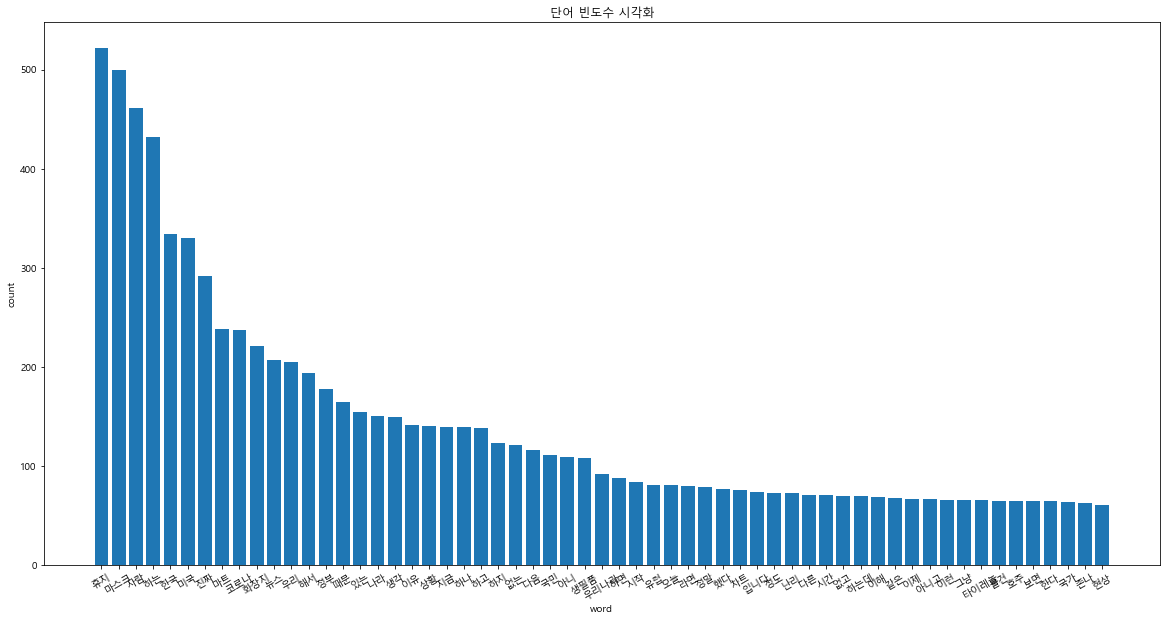

In [20]:
plt.figure(figsize=(20,10))
plt.bar(index,test['count'].tolist()) #단어 데이터를 통해 
plt.xlabel('word', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.xticks(index, test['word'].tolist(), fontsize=10, rotation=30)
plt.title('단어 빈도수 시각화')
plt.show()

{'휴지': 522, '마스크': 500, '사람': 461, '하는': 432, '한국': 334, '미국': 330, '진짜': 292, '마트': 238, '코로나': 237, '화장지': 221, '뉴스': 207, '우리': 205, '해서': 194, '정부': 178, '때문': 165, '있는': 155, '나라': 151, '생각': 150, '이유': 142, '상황': 141, '지금': 140, '하나': 140, '하고': 139, '하지': 123, '없는': 121, '다음': 116, '국민': 111, '아니': 109, '생필품': 108, '우리나라': 92, '하면': 88, '시작': 84, '유럽': 81, '오늘': 81, '라면': 80, '정말': 79, '했다': 77, '차트': 76, '입니다': 74, '정도': 73, '난리': 73, '다른': 71, '시간': 71, '없고': 70, '하는데': 70, '이해': 69, '같은': 68, '이제': 67, '아니고': 67, '이런': 66, '그냥': 66, '타이레놀': 66, '물건': 65, '호주': 65, '보면': 65, '한다': 65, '국가': 64, '존나': 63, '현상': 61}


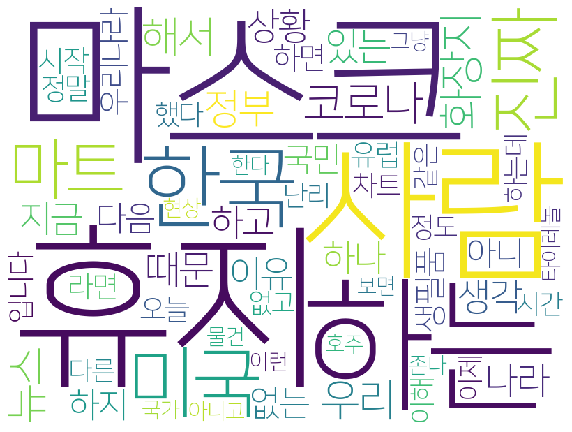

In [21]:
wc = WordCloud(font_path='NanumSquare_acL.ttf',background_color='white', width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
# 우선 순서대로 휴지, 마스크, 사람, 그리고 한국, 미국, 마트, 코로나 등등이 빈도수 높게 나옴을 확인할 수 있고, 
# 차트와 같은 단어들도 있는 것을 보아 코로나 사태와 관련한 사재기 관련 트윗들 뿐만 아니라, 사재기 음원과 관련한 트윗들도 많이 존재함을 확인할 수 있습니다
# 빈도수로 확인한 단어들 위주로, 아래서 모델 적용 후 유사도를 측정해보고자 하는 단어들을 선정했습니다 
#사재기와 유사도를 측정해볼 단어로 , '휴지', '마스크', '차트' 이 세가지로 결정했습니다

# 임베딩

In [24]:
#앞서 토크나이즈 해둔 그 데이터를 가져온다. 한음절인 것은 가져 오지 않음
vec = []
for i in range(len(text_result)):
    vec2 = []
    token = text_result['token'].iloc[i]
    if len(token) != 0: #토크나이즈 진행하면서 비어있는 리스트가 존재할 수도 있으므로 이는 제외하고
        for j in range(len(token)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(token[j]) > 1:
                vec2.append(token[j])
    if len(vec2) != 0:
        vec.append(vec2)

In [25]:
vec

[['미국', '화장지', '사재기', '여파', '하수', '처리', '시스템', '고음', '다음', '뉴스'],
 ['미국',
  '비데',
  '거의',
  '사용',
  '하지',
  '않는',
  '모양',
  '화장지',
  '사재기',
  '하수',
  '막힘',
  '경고',
  '나오고'],
 ['에고',
  '고생',
  '많으세요',
  '새삼',
  '마스크',
  '사람',
  '아시안',
  '타운',
  '본게',
  '놀랍네요',
  '물건',
  '사재기',
  '하지',
  '마스크',
  '낀건',
  '본적',
  '없어요'],
 ['이해',
  '할수',
  '없다',
  '미국',
  '화장지',
  '사재기',
  '여파',
  '하수',
  '처리',
  '시스템',
  '고음',
  '다음',
  '뉴스'],
 ['코로나', '미국', '마리화나', '사재기', '판매량', '급증', '다음', '뉴스'],
 ['한국', '연예인', '미스터', '트롯', '사재기', '의혹', '해명'],
 ['레알',
  '우리나라',
  '문프',
  '신뢰',
  '하기',
  '때문',
  '사재기',
  '하는',
  '거임',
  '국민',
  '거짓말',
  '아니라는',
  '아는거지',
  '심지어',
  '정권',
  '잡으려고',
  '열면',
  '문프',
  '정부',
  '공격',
  '하는',
  '기레기',
  '통닭',
  '문프',
  '신뢰',
  '그거',
  '사재기',
  '하는'],
 ['맞음', '사재기', '군인', '독재정', '명박', '혜때', '있었지', '외환위기', '참조'],
 ['대만',
  '화장지',
  '생필품',
  '사재기',
  '환자',
  '넘어서',
  '재발',
  '다음',
  '뉴스',
  '대만',
  '최고',
  '하니까',
  '무조건',
  '받으라',
  '안철수',
  '거지',
  '지금',
  '어디',
  '사라졌나',
  '대만'

## 첫번째 모델 - Word2Vec 사용!

In [26]:
from gensim.models import Word2Vec, fasttext

model1 = Word2Vec(vec, min_count=3,window=3,iter=20, size=100, sg=1) #먼저 word2vec 사용

In [167]:
words = model1.wv.index2word #one-hot encoding 알아서 해줌 
words

['사재기',
 '휴지',
 '마스크',
 '사람',
 '하는',
 '한국',
 '미국',
 '진짜',
 '마트',
 '코로나',
 '화장지',
 '뉴스',
 '우리',
 '해서',
 '정부',
 '때문',
 '있는',
 '나라',
 '생각',
 '이유',
 '상황',
 '지금',
 '하나',
 '하고',
 '하지',
 '없는',
 '다음',
 '국민',
 '아니',
 '생필품',
 '우리나라',
 '하면',
 '시작',
 '유럽',
 '오늘',
 '라면',
 '정말',
 '했다',
 '차트',
 '입니다',
 '정도',
 '난리',
 '다른',
 '시간',
 '없고',
 '하는데',
 '이해',
 '같은',
 '이제',
 '아니고',
 '이런',
 '그냥',
 '타이레놀',
 '물건',
 '호주',
 '보면',
 '한다',
 '국가',
 '존나',
 '현상',
 '시민',
 '외국',
 '문제',
 '음원',
 '없다',
 '걱정',
 '여기',
 '감자',
 '새끼',
 '일본',
 '보고',
 '공포',
 '노래',
 '있다',
 '달러',
 '진자',
 '해야',
 '아니라',
 '했는데',
 '대만',
 '멜론',
 '총알',
 '전쟁',
 '바이러스',
 '음식',
 '하는거',
 '누가',
 '출처',
 '사회',
 '하기',
 '인간',
 '대체',
 '그런',
 '합니다',
 '미국인',
 '해도',
 '얘기',
 '되는',
 '위기',
 '선진국',
 '나도',
 '네이버',
 '친구',
 '의식',
 '사태',
 '해외',
 '요즘',
 '세계',
 '환자',
 '거리',
 '영국',
 '대한민국',
 '영상',
 '위해',
 '없어서',
 '식료품',
 '제발',
 '박경',
 '중국',
 '구매',
 '하던',
 '하면서',
 '거의',
 '금지',
 '패닉',
 '같아요',
 '계속',
 '이번',
 '무슨',
 '가수',
 '저격',
 '대한',
 '독일',
 '시발',
 '있는데',
 '보니',
 '바로',
 '쇼핑',
 '어디',

In [168]:
vectors = model1.wv.vectors
vectors

array([[ 0.06806508,  0.30187637, -0.05523296, ...,  0.19874223,
         0.13491283, -0.1242988 ],
       [ 0.52696556, -0.02018725, -0.1704898 , ..., -0.04013245,
        -0.14524283,  0.05707128],
       [ 0.46645668, -0.09198499, -0.07846496, ...,  0.12275043,
        -0.1399486 ,  0.17727385],
       ...,
       [ 0.01927924,  0.05132321,  0.03271564, ...,  0.02556261,
         0.02250981, -0.18459761],
       [ 0.01957281,  0.03895793, -0.00981033, ...,  0.08521798,
         0.11226509, -0.1807931 ],
       [ 0.03724587,  0.04799487,  0.04421864, ...,  0.05072049,
         0.01933509, -0.1276572 ]], dtype=float32)

In [169]:
model1_result = dict(zip(words, vectors))

## 단어간 유사도 측정

In [84]:
model1.most_similar('사재기', topn=10) 
#먼저 사재기와 관련된 트윗들이기 때문에 '사재기'와 관련한 유사도들이 높은 
#상위 10개의 단어를 뽑았습니다
#생각보다 뜬금없는 단어들이 나왔는데
#그래도 사재기라는 단어와 함께 '미친'...이라는 단어가 제일 높게 나온거로 보아
#현재 사람들은 사재기라는 단어와 함께 부정적인 감정을 가지고 있으며,
#화장실, 용도 등, 앞서 빈도수에서 높게 나왔던 휴지, 마스크의 사재기 사태에 대한
#트윗을 많이 작성하고 있음을 확인할 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('미친', 0.6691584587097168),
 ('대요', 0.6573107838630676),
 ('하는거지', 0.6524103283882141),
 ('했던', 0.6507861018180847),
 ('화장', 0.6406606435775757),
 ('이런거', 0.6336045265197754),
 ('샤워', 0.632517397403717),
 ('용도', 0.6323884725570679),
 ('대체', 0.6318482160568237),
 ('하는구나', 0.6318246722221375)]

In [85]:
model1.most_similar(['휴지'], topn=10)
#모델이 단어들간의 유사도를 잘 파악하였는지, 그리고 왜 단어 빈도수가 높게 나왔는지
#확인하고 싶어 앞서 빈도수가 가장 높게 나왔던, 휴지와 높은 유사도를 띠는 단어들을 확인했습니다

#두루마리, 화장실, 샤워 등 휴지와 비슷한 맥락의 단어들이 나온 걸 보아
#이 모델은 나름 잘 임베딩한 듯 합니다
#특히 '없음', '대체'이런 단어들을 보아,
#사람들은 사재기에 관해 부정적인 단어들과 함께 사용하고 있고,
#현재 코로나 사태와 함께 휴지 사재기가 일어나고, 세계적으로 화장실 휴지를 구하지 못해 없다 , 특히 외국이 심각하다..
#이러한 사회적 맥락을 확인할 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('화장실', 0.9391673803329468),
 ('마리', 0.9084299802780151),
 ('외국', 0.9059953689575195),
 ('두루', 0.9014072418212891),
 ('대체', 0.8911997079849243),
 ('없음', 0.8805422782897949),
 ('닦을', 0.8791775107383728),
 ('할까', 0.8730409145355225),
 ('하는거야', 0.8717250227928162),
 ('하는거지', 0.8716096878051758)]

In [86]:
model1.most_similar(['사재기','마스크'], topn=10)

#마스크와 관련해서는 필터, 비누, 샤워, 화장, 손세정제는 비슷한 맥락의 단어이지만
#백인이 가장 유사도가 높게 나오고, 이 단어 역시 없음이라는 단어와 유사도가 굉장히 높은 것을 보아
#이 역시 마스크와 관련해서 코로나 사태와 관련하여 마스크를 쓰지 않는 백인들에 대한 현재 상황,
#또한 앞서 사재기와 관련해서 부정적인 반응을 보아 사재기를 하는 백인들에 대한 부정적인 여론을 엿볼 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('백인', 0.8448970317840576),
 ('쓰면', 0.8311977386474609),
 ('필터', 0.826343297958374),
 ('비누', 0.8247438669204712),
 ('펄프', 0.8242089152336121),
 ('샤워', 0.8171914219856262),
 ('없음', 0.8169150352478027),
 ('만드느라', 0.8164355158805847),
 ('화장', 0.8156240582466125),
 ('손세정제', 0.8154425621032715)]

In [87]:
model1.most_similar(['차트'], topn=10)
#단어 빈도수를 확인했을 때 '차트'라는 약간 다른 성격의 단어도 역시 유사도를 확인해보면
#(사실 사재기와 관련한 데이터들을 불러와 코로나사태관련 사재기, 음원 사재기 관련, 이렇게 나누어서 분석해보는게 최종목표였기 때문에..)
#이미 사재기에 관한 트윗 데이터들임을 알고 있는 상태이므로 그와 관련한 데이터들이고,
#그 중 차트와 관련해서는 멜론, 새로고침 순위 들이 가장 유사도 높게 측정되었는데
#특히 박경, 신곡, 기계 , 근절 과 같은 단어들을 보아
#최근나온 박경의 신곡은 음원 사재기와 관련한 내용을 가지고 있는 듯 해 보이고
#전체적은 사재기에 대한 부정적인 반응을 보아
#차트 속 사재기 사태를 기계라는 단어와 함께 비판하고 있음을 확인 할 수 있습니다


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('멜론', 0.9649590253829956),
 ('새로고침', 0.9528447389602661),
 ('순위', 0.9499069452285767),
 ('박경', 0.9410505294799805),
 ('지니', 0.9408140182495117),
 ('신곡', 0.940349280834198),
 ('기계', 0.9368687868118286),
 ('근절', 0.9349706768989563),
 ('가수', 0.933478057384491),
 ('제발', 0.9294520020484924)]

## Visualize - TSNE, Clustering

In [ ]:
#원래는 그냥 차원 축소 후 그냥 plot시켰는데
#정확히 어떤 단어들끼리 묶어있고 비슷하게 위치되어있는지
#눈에 잘 안들어 온다고 판단하였기 때문에
#clustering을 통해 어떤 단어들끼리 비슷하게 묶어 있는지 좀 더 잘 확인하고 싶었습니다!

In [170]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#tsne이용해 차원축소
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
 
# plot 갯수. 8000개의 embeddings로부터 앞쪽 일부만 사용.
# low_dim_embs에는 변환된 좌표 x, y가 들어있다.
plot_only = 500
low_dim_embs = tsne.fit_transform(vectors[:plot_only])     # 앞서 모델을 이용해 구해놓은 vector중 500개만 사용(500, 2)
labels = words[:plot_only] 

In [171]:
from sklearn.cluster import KMeans

num_clusters = 6 #cluster의 갯수는 임의적으로 4개로 정했습니다
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [172]:
cluster_km = kmeans_clustering.fit_predict(low_dim_embs)

In [173]:
cluster_km 

array([2, 4, 5, 1, 5, 0, 0, 2, 4, 3, 0, 0, 4, 5, 3, 1, 1, 3, 2, 0, 0, 1,
       1, 2, 3, 0, 0, 3, 2, 0, 0, 4, 4, 0, 5, 2, 1, 5, 2, 1, 1, 0, 5, 5,
       3, 2, 5, 1, 4, 5, 1, 2, 5, 4, 0, 5, 0, 3, 2, 0, 3, 5, 1, 2, 1, 1,
       1, 5, 2, 0, 4, 3, 2, 3, 0, 3, 1, 3, 2, 0, 2, 0, 5, 3, 2, 2, 4, 0,
       3, 5, 5, 5, 1, 3, 1, 1, 4, 1, 3, 3, 4, 0, 4, 3, 3, 0, 4, 0, 0, 3,
       0, 3, 1, 5, 2, 0, 2, 2, 0, 5, 1, 5, 3, 3, 0, 1, 4, 2, 2, 2, 2, 3,
       0, 2, 4, 4, 2, 5, 5, 5, 4, 3, 0, 4, 3, 3, 4, 2, 2, 1, 4, 2, 3, 1,
       1, 1, 2, 1, 3, 3, 0, 3, 0, 2, 3, 4, 0, 1, 4, 1, 4, 3, 5, 4, 1, 3,
       5, 5, 2, 4, 3, 3, 3, 5, 4, 3, 2, 5, 1, 2, 3, 4, 5, 0, 5, 4, 1, 3,
       1, 3, 0, 4, 4, 0, 2, 0, 5, 1, 3, 4, 5, 3, 5, 0, 4, 3, 5, 3, 5, 2,
       1, 5, 4, 5, 5, 5, 2, 0, 2, 3, 1, 0, 2, 2, 2, 3, 1, 4, 0, 4, 4, 2,
       1, 0, 5, 4, 0, 4, 3, 5, 1, 2, 1, 0, 2, 2, 3, 2, 2, 0, 0, 3, 5, 4,
       1, 4, 2, 1, 3, 2, 2, 2, 5, 3, 4, 0, 1, 1, 0, 3, 2, 1, 3, 4, 5, 3,
       1, 4, 0, 1, 5, 0, 1, 4, 4, 4, 4, 0, 3, 3, 4,

In [174]:
cluster_km=list(cluster_km)

In [175]:
word_centroid = {labels[i] : cluster_km[i] for i in range(len(cluster_km))}

In [176]:
for i in range(num_clusters):
    print('cluster' , i)
    
    word=[]
    for j in range(len(labels)):
        if word_centroid[labels[j]]==i:
            word.append(labels[j])
    print(word)
#대중 어떤 단어들이 cluster로 묶었는지 확인해보니

#첫번째 cluster에는  마스크, 라면, 마켓, 품절 등 전체적으로 생필품의 종류들에 대해 있음
#두번째 cluster에는 코로나 현상과 함께 여러 나라들, 그리고 뉴스, 가짜 , 확산, 발표, 네티즌 과 같은
#사재기와 크게 관련 되어 있을 코로나사태에 대한 불안감, 그리고 뉴스 속 내용들을 묶어 두고 있음을 확인할 수 있음
#세번째 cluster에는 차트, 음원, 멜론, 박경, 가수, 저격, 스밍, 논란 등의 단어들로 음원 사재기 상황에 대한
#단어들로 묶여있음


cluster 0
['한국', '미국', '화장지', '뉴스', '이유', '상황', '없는', '다음', '생필품', '우리나라', '유럽', '난리', '호주', '한다', '현상', '일본', '달러', '대만', '총알', '출처', '네이버', '해외', '세계', '환자', '영국', '식료품', '중국', '패닉', '독일', '기레기', '대비', '전세계', '기사', '민족', '공장', '공유', '주는', '재발', '국내', '어떤', '루머', '캐나다', '넘어서', '언론', '상태', '비전문가', '준비', '가짜', '현재', '와중', '생산', '혼란', '가장', '감동', '대란', '정신', '이탈리아', '김어준', '숙연', '해진', '관련', '통화', '불안감', '없는데', '시장', '해결', '뉴욕', '네티즌', '현실', '이후', '소식', '발표', '몸살', '원료', '대도', '매체', '신문', '조중동', '유독', '약탈', '최고', '스와프', '북한', '손소독제']
cluster 1
['사람', '때문', '있는', '지금', '하나', '정말', '입니다', '정도', '같은', '이런', '문제', '없다', '걱정', '여기', '해야', '그런', '미국인', '해도', '되는', '영상', '하던', '같아요', '사는', '한국인', '하게', '있고', '인종차별', '같다', '분위기', '아닌', '다행', '심지어', '일단', '마음', '가지', '없어', '역시', '배달', '아닐까', '있어', '식량', '필요', '제일', '먼저', '좋은', '있어서', '하다', '슈퍼', '아닌가', '일주일', '있을', '구입', '여러분', '미리', '사지', '생활', '되어', '불안', '별로', '일상', '않을까', '행동', '비교', '수가', '정작', '없다고', '커피', '대부분', '하다가', '있나', '아이', '아마', '저리

In [ ]:
#클러스터링 결과와 함께 시각화해보면

In [177]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib


In [178]:
import pandas as pd
df = pd.DataFrame(low_dim_embs.tolist(),index=labels,columns=['x','y'])

In [179]:
cluster_df = []
for i in range(len(df)):
    cluster_df.append(word_centroid[df.index.tolist()[i]])

In [180]:
df['cluster'] = cluster_df

In [181]:
df.head() #차원축소한 데이터들로 x,y결정

,x,y,cluster
사재기,4.918229,-22.700378,2
휴지,-0.142993,-20.916660,4
마스크,11.341174,3.917913,5
사람,-1.050228,2.864618,1
하는,1.878728,6.424203,5


In [182]:
#plt.style.use('ggplot')

In [183]:
path_gothic = '서울남산 장체M.ttf'
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

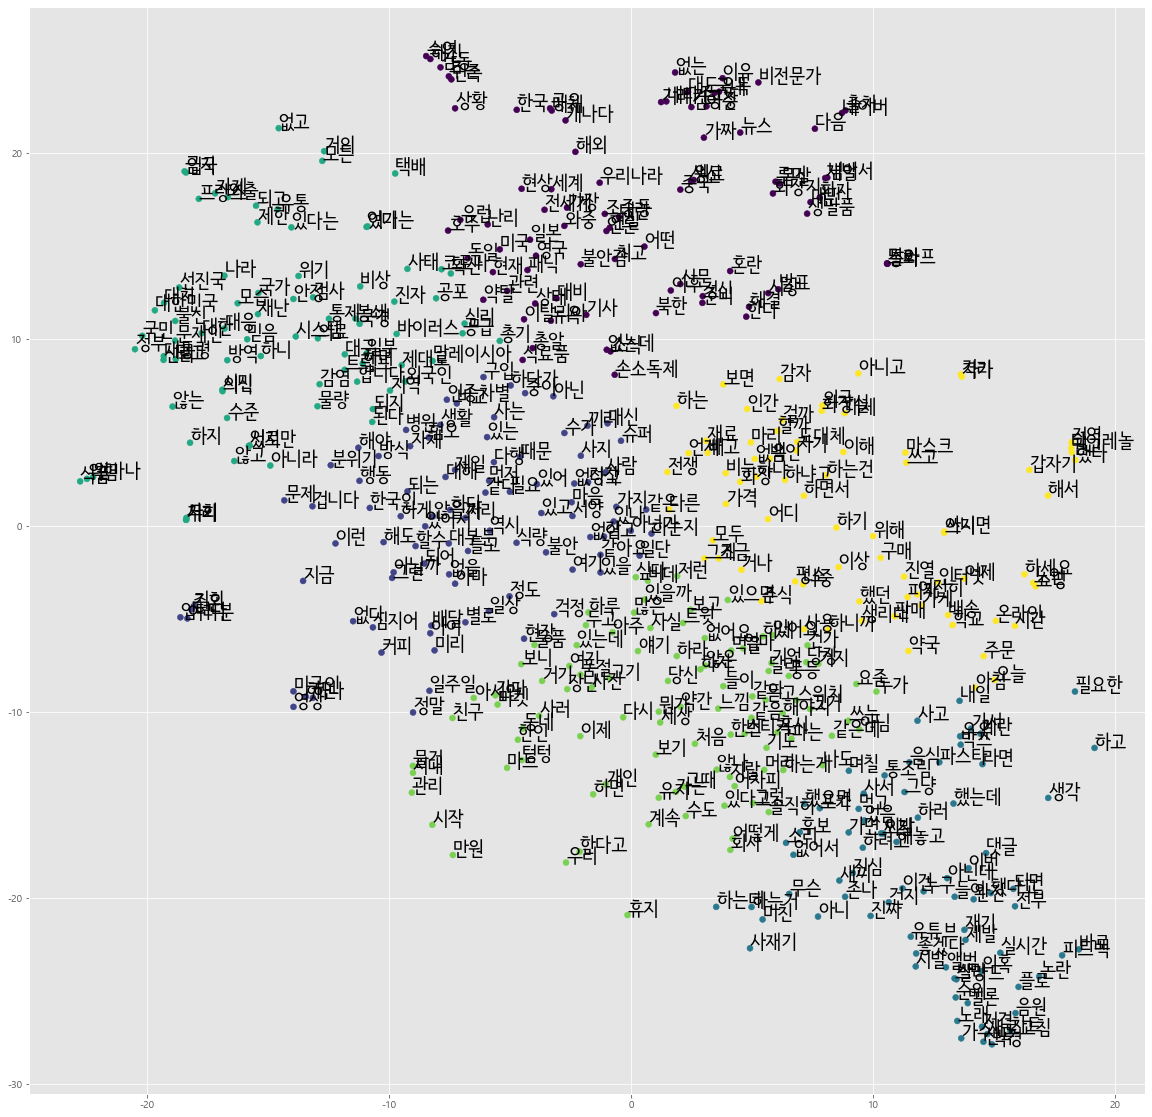

In [184]:
#클러스터링결과 , 그리고 단어 임베딩 결과 
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"],c=df['cluster'])

for word, pos in list(df.iloc[:,:-1].iterrows()):
    ax.annotate(word, pos, fontsize=20, fontproperties=prop)
plt.show()


## FastText

In [103]:
#똑같은 방식으로 fasttext 모델로 한번 더 진행하였습니다
from gensim.models import Word2Vec, FastText

model2 = FastText(vec, size=10, window=3, min_count=4, workers=4, iter=1000, sg=1)

In [104]:
words = model2.wv.index2word #one-hot encoding
words

['사재기',
 '휴지',
 '마스크',
 '사람',
 '하는',
 '한국',
 '미국',
 '진짜',
 '마트',
 '코로나',
 '화장지',
 '뉴스',
 '우리',
 '해서',
 '정부',
 '때문',
 '있는',
 '나라',
 '생각',
 '이유',
 '상황',
 '지금',
 '하나',
 '하고',
 '하지',
 '없는',
 '다음',
 '국민',
 '아니',
 '생필품',
 '우리나라',
 '하면',
 '시작',
 '유럽',
 '오늘',
 '라면',
 '정말',
 '했다',
 '차트',
 '입니다',
 '정도',
 '난리',
 '다른',
 '시간',
 '없고',
 '하는데',
 '이해',
 '같은',
 '이제',
 '아니고',
 '이런',
 '그냥',
 '타이레놀',
 '물건',
 '호주',
 '보면',
 '한다',
 '국가',
 '존나',
 '현상',
 '시민',
 '외국',
 '문제',
 '음원',
 '없다',
 '걱정',
 '여기',
 '감자',
 '새끼',
 '일본',
 '보고',
 '공포',
 '노래',
 '있다',
 '달러',
 '진자',
 '해야',
 '아니라',
 '했는데',
 '대만',
 '멜론',
 '총알',
 '전쟁',
 '바이러스',
 '음식',
 '하는거',
 '누가',
 '출처',
 '사회',
 '하기',
 '인간',
 '대체',
 '그런',
 '합니다',
 '미국인',
 '해도',
 '얘기',
 '되는',
 '위기',
 '선진국',
 '나도',
 '네이버',
 '친구',
 '의식',
 '사태',
 '해외',
 '요즘',
 '세계',
 '환자',
 '거리',
 '영국',
 '대한민국',
 '영상',
 '위해',
 '없어서',
 '식료품',
 '제발',
 '박경',
 '중국',
 '구매',
 '하던',
 '하면서',
 '거의',
 '금지',
 '패닉',
 '같아요',
 '계속',
 '이번',
 '무슨',
 '가수',
 '저격',
 '대한',
 '독일',
 '시발',
 '있는데',
 '보니',
 '바로',
 '쇼핑',
 '어디',

In [105]:
vectors = model2.wv.vectors
vectors

array([[ 0.02950387,  0.6217913 ,  0.12556432, ...,  0.29817438,
         0.00728294, -0.07772601],
       [ 0.01669719,  0.544984  ,  0.2794292 , ...,  0.82872766,
         0.35285664, -0.09758243],
       [-0.36056855,  0.53834903,  0.16393484, ...,  0.67082846,
         0.33939934, -0.10280118],
       ...,
       [-0.21359852,  0.21500693, -0.6488247 , ...,  1.2342421 ,
         0.2986408 ,  0.50267637],
       [ 1.2910851 ,  1.7052071 ,  0.87738854, ...,  1.1310538 ,
        -1.8429159 , -0.38072106],
       [ 1.4914562 ,  3.7552547 ,  0.3910803 , ...,  1.2756643 ,
        -1.5471684 , -0.09712366]], dtype=float32)

In [106]:
model2_result = dict(zip(words, vectors))

In [107]:
model2.most_similar('사재기', topn=10)
#여기서는 사재기와 관련해서 기승, 빈발, 지금, 요즘, 찾아서 등의 단어들이 나온걸 보아
#요즘, 지금 사재기가 기승을 부리고 있음을 유사도 높게 보여주고 있는 것 같아
#앞서 보았던 word2vec 보다 더 좋은 결과를 보여주고 있는 것 같습니다
#홍콩이라는 단어 역시, 홍콩에서 일어나고 있는 마스크 사재기 현상을 볼 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('기승', 0.907490611076355),
 ('없어', 0.9049769043922424),
 ('보고', 0.8057048916816711),
 ('홍콩', 0.8018982410430908),
 ('지금', 0.7818506360054016),
 ('로맥', 0.7785837650299072),
 ('진짜', 0.7676822543144226),
 ('시원', 0.7658957242965698),
 ('내놔', 0.7621814608573914),
 ('재발', 0.7618134617805481)]

In [111]:
model2.most_similar(['사재기','휴지'], topn=10)
#사재기, 휴지라는 단어와 함계 없어라는 단어가 높게 나오고, 대체, 내놔, 한장 등의 휴지와 관련한 단어들과 보면
#휴지가 없어 사재기가 기승이라는 현 상황을 알 수 있고
#특히 홍콩과 백인사이에서 그 일이 많이 일어나고 있음을 예상할 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('없어', 0.8553500175476074),
 ('기승', 0.8429255485534668),
 ('비전문가', 0.8386586904525757),
 ('대체', 0.8342480063438416),
 ('내놔', 0.8314179182052612),
 ('몰라도', 0.8301550149917603),
 ('왜함', 0.8283820152282715),
 ('홍콩', 0.820578932762146),
 ('백인', 0.8035385608673096),
 ('한장', 0.8032861948013306)]

In [114]:
model2.most_similar(['마스크'], topn=10)
#이미 사재기와 관련된 트윗들임을 알고있기 때문에
#마스크에 대한 유사도가 높은 단어들을 보면
#천원, 소량, 수출, 가격, 어떡해 라는 단어들은 마스크에 대해 수출, 소량이라는 상황에 대해 걱정을 하고 있음을 알 수 있습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('공적', 0.8942956924438477),
 ('천원', 0.8888065814971924),
 ('소량', 0.8638715147972107),
 ('돌려', 0.8513377904891968),
 ('수출', 0.8446937203407288),
 ('어떡해', 0.8410152196884155),
 ('개비', 0.8340317010879517),
 ('약과', 0.8240514993667603),
 ('대표', 0.8230665922164917),
 ('가격', 0.8178195953369141)]

In [113]:
model2.most_similar(['차트'], topn=10)
#이 역시 이미 사재기에 관한 트윗들임을 알고 있음으로
#차트에 대해 유사도가 높은 단어들을 살펴보면
#멜론, 지니 등 음원 사이트 뿐만아니라 
#박경, 소신, 새로고침(찾아보니까 박경의 신곡 제목이네요), 응원등의 단어들이
#음원 차트 사재기에 관련해서 박경의 신곡에 대해 응원하고 있는 듯합니다

#차트와 관련해서 음원사이트들에 대해 크게 유사도를 보인 것으로 보아 이 모델은 굉장히
#임베딩을 잘한 듯합니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('멜론', 0.9590420126914978),
 ('박경', 0.9281024932861328),
 ('기계', 0.9269543886184692),
 ('지니', 0.9204373359680176),
 ('음원', 0.9170851111412048),
 ('소신', 0.9155963063240051),
 ('플로', 0.9022323489189148),
 ('새로고침', 0.8985570669174194),
 ('응원', 0.891971230506897),
 ('단지', 0.8906443119049072)]

In [115]:
#앞서 한 방법으로 동일하게 차원축소 후 클러스터링을 진행하였습니다
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
 
# plot 갯수. 8000개의 embeddings로부터 앞쪽 일부만 사용.
# low_dim_embs에는 변환된 좌표 x, y가 들어있다.
plot_only = 500
low_dim_embs = tsne.fit_transform(vectors[:plot_only])     # (500, 2)
labels = words[:plot_only] 

In [155]:
from sklearn.cluster import KMeans

num_clusters = 6 #cluster의 개수는 임의적으로 3개로 선정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default

In [156]:
cluster_km = kmeans_clustering.fit_predict(low_dim_embs)

In [157]:
word_centroid = {labels[i] : cluster_km[i] for i in range(len(cluster_km))}

In [158]:
for i in range(num_clusters):
    print('cluster' , i)
    
    word=[]
    for j in range(len(labels)):
        if word_centroid[labels[j]]==i:
            word.append(labels[j])
    print(word)

cluster 0
['진짜', '아니', '차트', '이해', '아니고', '존나', '음원', '새끼', '노래', '멜론', '누가', '인간', '박경', '가수', '저격', '시발', '바로', '앨범', '미친', '되면', '발라드', '어떻게', '아님', '순위', '그럼', '도대체', '새로고침', '사서', '재기', '좋겠다', '회사', '진심', '논란', '스밍', '누구', '유튜브', '신곡', '할까', '없음', '백인', '댓글', '의혹', '듣고', '하는건', '해놓고', '쓰는', '후보', '플로', '솔직히', '혹시', '없다고', '씨발', '시대', '피드백', '포카', '어차피', '해야지', '했으면', '유독', '하냐고', '실시간', '서양', '끼리']
cluster 1
['뉴스', '이유', '없는', '다음', '생필품', '했다', '입니다', '달러', '대만', '출처', '하기', '네이버', '환자', '이번', '기레기', '기사', '택배', '공장', '공유', '재발', '국내', '루머', '배달', '넘어서', '아닐까', '언론', '비전문가', '가짜', '좋은', '생산', '혼란', '감동', '여러분', '김어준', '숙연', '해진', '통화', '미리', '사용', '거나', '네티즌', '마리', '몸살', '그때', '원료', '들이', '대도', '매체', '기회', '신문', '겁니다', '스와프', '병원']
cluster 2
['마스크', '사람', '해서', '지금', '하고', '정도', '하는데', '이제', '그냥', '타이레놀', '물건', '걱정', '감자', '해야', '했는데', '사회', '해도', '나도', '거리', '중국', '하면서', '같아요', '계속', '있는데', '어디', '쓰고', '그거', '사실', '하게', '있고', '같다', '분위기', '아닌', '모두', '권고', '않고', '필요한', '민족', '일

In [160]:
import pandas as pd
df = pd.DataFrame(low_dim_embs.tolist(),index=labels,columns=['x','y'])

In [161]:
cluster_df = []
for i in range(len(df)):
    cluster_df.append(word_centroid[df.index.tolist()[i]])

In [162]:
df['cluster'] = cluster_df

In [163]:
df.head()

,x,y,cluster
사재기,-0.151777,3.051856,3
휴지,-0.558197,12.424843,3
마스크,8.733836,6.941037,2
사람,1.056474,3.634131,2
하는,-0.046019,4.160604,3


In [165]:
path_gothic = '서울남산 장체M.ttf'
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

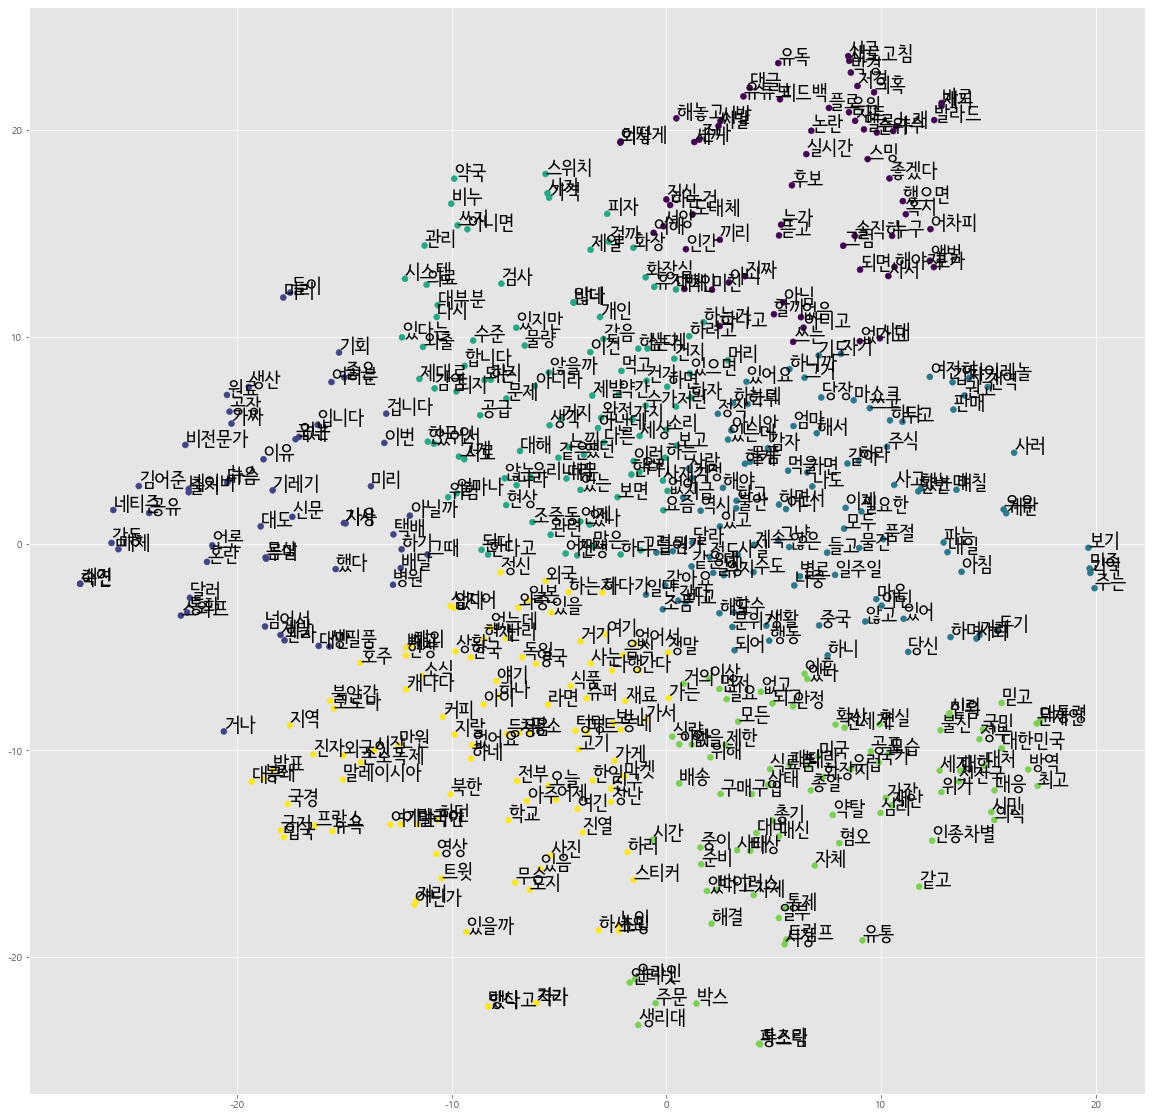

In [166]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"],c=df['cluster'])

for word, pos in list(df.iloc[:,:-1].iterrows()):
    ax.annotate(word, pos, fontsize=20, fontproperties=prop)
plt.show()

In [ ]:
#전체적으로 사재기에 대한 단어들이 유사도에 의해 잘 뭉쳐져 있으며, 
#특히 사재기와 관련해서 코로나 사태와 관련해 약간 다른 성격이라고 볼 수 있는 음원 사재기에 대한 단어들이
#한 쪽에 따로 cluster되는 것을 보아 두 모델 다 잘 임베딩되었지만

#앞서 5개만 확인했을 때, word2vec은 사재기, 휴지, 마스크, 사람을 모두 다른 cluste로 분류한 반면에
#fasttext는 사재기, 휴지  /사람, 마스크 이렇게 같은 clsuter로 묶었는데 
#단어간 유사도를 확인한 부분과 이렇게 클러스터링한 결과를 확인해보면 fasttext가 
#이 데이터에는 더 적절한 임베딩 모델인 듯합니다!


#사재기 사태로 코로나와 관련해서 휴지, 마스크, 생필품을 사재기하는 상황과 음원 사재기와 관련한 두 가지 부류로 나누어 생각할 수 있고
#특히 휴지, 마스크에 관해서는 '없음'이라는 단어와 함께 부정적으로 바라보고 있음.
#지금과 요즘이라는 단어가 유사도 높게 나오는 것을 보아 현 시점의 상황들을 이는 보여주고 있음

#사재기와 관련해서 차트에 대한 단어들 역시 빈도수가 높았으며, 그와 관련한 단어들이 많이 존재해 클러스터링 되었는데
#여기서는 박경의 신곡발표와 함께 사재기, 기계라고 표현하며 박경의 신곡에 대해 응원을 하고 있음을 알수 있었음!